In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from network import Model

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import json
from tools_lnd import rule_set_names, remove_ax_lines

In [3]:
figpath = os.path.join(p,'code','overleaf','multitask-nets','v4_figs','paper_figs','fig2','compare_corr_mat_final1')
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [4]:
task_name_dict = {}
task_name_dict['Dly Anti'] = rule_set_names[5]
task_name_dict['RT Go'] = rule_set_names[1]
task_name_dict['Dly Go'] = rule_set_names[2]
task_name_dict['RT Anti'] = rule_set_names[4]
task_name_dict['Anti'] = rule_set_names[3]
task_name_dict['Go'] = rule_set_names[0]
task_name_dict['DNMS'] = rule_set_names[12]
task_name_dict['DMS'] = rule_set_names[11]
task_name_dict['DMC'] = rule_set_names[13]
task_name_dict['DNMC'] = rule_set_names[14]
task_name_dict['Dly DM 2'] = rule_set_names[7]
task_name_dict['Dly DM 1'] = rule_set_names[6]
task_name_dict['Ctx Dly DM 2'] = rule_set_names[9]
task_name_dict['Ctx Dly DM 1'] = rule_set_names[8]
task_name_dict['MultSen Dly DM'] = rule_set_names[10]

In [5]:
# # feature_names_master = ['DNMS fix1', 'DNMC fix1', 'Dly Anti fix1', 'DMC fix1',
# #        'Ctx Dly DM 2 fix1', 'Anti fix1', 'Dly DM 1 fix1', 'Dly DM 2 fix1',
# #        'MultSen Dly DM fix1', 'Go fix1', 'Dly Go fix1',
# #        'Ctx Dly DM 1 fix1', 'DMS fix1', 'RT Go fix1', 'RT Anti fix1',
# #        'DMS delay1', 'DMS go1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
# #        'MultSen Dly DM go1', 'Go go1', 'Dly Go go1', 'Dly DM 1 go1',
# #        'Dly DM 2 go1', 'Anti go1', 'Anti stim1', 'Ctx Dly DM 2 delay1',
# #        'Ctx Dly DM 2 delay2', 'Ctx Dly DM 1 delay2',
# #        'Ctx Dly DM 1 delay1', 'MultSen Dly DM delay1',
# #        'MultSen Dly DM delay2', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
# #        'Dly Go delay1', 'Dly DM 1 delay2', 'Dly DM 2 delay2',
# #        'DMC delay1', 'DNMC delay1', 'Dly Anti delay1', 'Dly Anti go1',
# #        'DMC stim1', 'Dly Anti stim1', 'Dly Go stim1', 'DMS stim1',
# #        'MultSen Dly DM stim1', 'MultSen Dly DM stim2', 'Dly DM 2 stim1',
# #        'Ctx Dly DM 2 stim1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
# #        'Ctx Dly DM 1 stim1', 'Ctx Dly DM 1 stim2', 'Dly DM 1 stim2',
# #        'Go stim1', 'Dly DM 1 stim1', 'RT Anti go1', 'DNMS go1',
# #        'RT Go go1', 'DMC go1', 'DNMC go1', 'DNMS delay1', 'DNMS stim1',
# #        'DNMC stim1']


# feature_names_master = ['DNMS go1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
#        'RT Anti fix1', 'RT Go fix1', 'DNMC fix1', 'Dly DM 1 fix1',
#        'Ctx Dly DM 1 fix1', 'DNMS fix1', 'DMS fix1', 'Anti fix1',
#        'Dly Anti fix1', 'DMC fix1', 'Ctx Dly DM 2 fix1', 'Go fix1',
#        'MultSen Dly DM fix1', 'Dly Go fix1', 'Dly DM 2 fix1',
#        'Dly Go go1', 'Dly Anti go1', 'Ctx Dly DM 2 go1',
#        'Ctx Dly DM 1 go1', 'MultSen Dly DM go1', 'Dly DM 1 go1',
#        'Dly DM 2 go1', 'RT Anti go1', 'Go go1', 'Anti go1', 'Anti stim1',
#        'Dly Anti stim1', 'Dly DM 1 stim1', 'Go stim1', 'Dly Go stim1',
#        'Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'Ctx Dly DM 2 stim1',
#        'MultSen Dly DM stim1', 'Dly DM 1 delay2', 'Dly DM 2 delay2',
#        'Dly Anti delay1', 'Ctx Dly DM 2 delay2', 'Ctx Dly DM 1 delay2',
#        'MultSen Dly DM delay2', 'Dly Go delay1', 'Ctx Dly DM 1 delay1',
#        'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
#        'Ctx Dly DM 2 delay1', 'DMS stim1', 'DNMS stim1', 'DMC stim1',
#        'DNMC stim1', 'Dly DM 1 stim2', 'Dly DM 2 stim2',
#        'Ctx Dly DM 1 stim2', 'Ctx Dly DM 2 stim2', 'MultSen Dly DM stim2',
#        'DNMS delay1', 'DMS delay1', 'DMC delay1', 'DNMC delay1']

feature_names_master = ['DMS delay1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
       'DNMS delay1', 'DNMS go1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
       'Dly DM 1 stim2', 'Ctx Dly DM 1 stim2', 'MultSen Dly DM stim2',
       'DMS stim1', 'DMC stim1', 'Go stim1', 'Dly Go stim1',
       'Ctx Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'MultSen Dly DM stim1',
       'Dly DM 1 stim1', 'Dly DM 2 stim1', 'RT Anti go1', 'DMC delay1',
       'DNMC delay1', 'Anti stim1', 'Dly Anti stim1', 'DNMS stim1',
       'DNMC stim1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
       'MultSen Dly DM go1', 'Anti go1', 'Go go1', 'Dly DM 1 go1',
       'Dly DM 2 go1', 'Dly Go go1', 'Dly Anti go1',
       'MultSen Dly DM delay2', 'Ctx Dly DM 1 delay1',
       'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
       'Ctx Dly DM 1 delay2', 'Ctx Dly DM 2 delay1',
       'Ctx Dly DM 2 delay2', 'Dly Anti delay1', 'Dly Go delay1',
       'Dly DM 1 delay2', 'Dly DM 2 delay2']

In [6]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 100, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        print(i)
        if d_old!=0 and d/d_old < 1 + tol: break
    return R, dot(Phi, R)

In [7]:
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

def remove_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    
def plot_epoch_labels(ax, epoch_binary, which_axes = 'y', ms = 1):
    
    e_set = ['stim1','stim2','delay1','delay2','go1']
    e_color = plt.get_cmap('terrain')

    yl = np.max(ax.get_ylim())+2
    xl = np.max(ax.get_xlim())+2
    
    for ei in range(len(e_set)):
        e_name = e_set[ei]
        where = np.where(epoch_binary[e_name])[0]-.5
        c = e_color(ei/len(e_set))
        
        if 'y' in which_axes:
            
            ax.plot(np.where(epoch_binary[e_name])[0],
                     yl*np.ones(np.sum(epoch_binary[e_name])),'s',
                     color = c,markersize = ms,label = e_name)

            for w in where:
            
                rect = patches.Rectangle((w, yl), 1, 3,linewidth=ms, edgecolor=c, facecolor=c)
                ax.add_patch(rect)
            
        if 'x' in which_axes:
            
            ax.plot(xl*np.ones(np.sum(epoch_binary[e_name])),
                     np.where(epoch_binary[e_name])[0],'s',
                     color = c,markersize = ms,label = e_name)
            
            for w in where:
                rect = patches.Rectangle((xl, w), 3, 1,linewidth=ms, edgecolor=c, facecolor=c)
                ax.add_patch(rect)
            
            
def plot_epoch_rects(ax, epoch_binary, e_set, which_axes = 'y', rect_height = 1, rect_width = 58, ll = []):
    e_color = plt.get_cmap('terrain')

    if len(ll)>0:
        xl = ll[1]
        yl = ll[0]
    else:
        yl = np.max(ax.get_ylim())+2
        xl = np.max(ax.get_xlim())+2

        
    for ei in range(len(e_set)):
        e_name = e_set[ei]
        c = e_color(ei/len(e_set))
        
        if 'y' in which_axes:
            
            for ind in np.where(epoch_binary[e_name])[0]:
                rect=mpatches.Rectangle((ind-.5,yl),rect_height,rect_width,
                                        fill=True,color=c,facecolor=c,alpha = .3,clip_on=False)
                plt.gca().add_patch(rect)
            
        if 'x' in which_axes:
            
            for ind in np.where(epoch_binary[e_name])[0]:
                rect=mpatches.Rectangle((xl,ind-.5),rect_height,rect_width,
                                        fill=True,color=c,facecolor=c,alpha = .3,clip_on=False)
                plt.gca().add_patch(rect)
        

In [8]:
from scipy.cluster import hierarchy
color_palette = ['k','c', 'm', 'y']
hierarchy.set_link_color_palette(color_palette)

In [9]:
##################################################################
#Find right model dir
##################################################################
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
method = 'ward'
max_d = 3.5
sparsity_threshold = .15
ex_1 = 1
ex_2 = 6
ex_3 = 8
al = .3
seed_set = [str(0),str(1),str(2)]#[str(0),str(1)]

rule_trains = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
          'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
          'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_trains_str = '_'.join(rule_trains)

n_tasks = str(len(rule_trains))
n_rnn = 128
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = 1
lr = -6
sigma_rec = 1/20
sigma_x = 2/20
pop_rule = 5
ruleset = 'all'
w_rec_coeff  = 8/10
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
data_folder_all = 'data/rnn/multitask/stepnet/'

# identify master network to compare other networks to. can be chosen randomly
rnn_type_master = 'LeakyRNN'
activation_master = 'softplus'
w_init_master = 'diag'
label_master = ' '.join([rnn_type_master,activation_master,w_init_master])
seed_master = str(1)
# m_master = os.path.join(p,data_folder_all,'final1',rnn_type_master,activation_master,w_init_master,
#                         n_tasks+'_tasks',n_rnn+'_n_rnn',net_name,seed_master)

net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

m_master = os.path.join(p,'data','rnn','multitask',net,'final1',ruleset,rnn_type_master,activation_master,
    w_init_master,str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))

lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+'distance'+'_max_d'+str(max_d)
save_dir = os.path.join(m_master,lesion_folder)
cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
feature_names_master = cluster_var['tick_names']

# set of networks to compare
rnn_type_set = ['LeakyGRU','LeakyRNN']
activation_set = ['tanh','retanh','softplus']
w_init_set = ['diag','randgauss']
data_folder_set = ['final1','untrained']
color_set = {}
color_set['final1'] = 'k'
color_set['untrained'] = 'dodgerblue'
color_set['no_noise'] = 'orangered'

tril_corr_mat_ave = {}

for rnn_type_i in range(len(rnn_type_set)):
    
    rnn_type = rnn_type_set[rnn_type_i]
    tril_corr_mat_ave[rnn_type] = {}
    
    for activation_i in range(len(activation_set)):
        
        activation = activation_set[activation_i]
        tril_corr_mat_ave[rnn_type][activation]= {}
        
        for w_init_i in range(len(w_init_set)):
            
            w_init = w_init_set[w_init_i]
            tril_corr_mat_ave[rnn_type][activation][w_init] = {}

            for data_folder in data_folder_set:
                
                tril_corr_mat_ave[rnn_type][activation][w_init][data_folder] = {}

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
                        w_rec_coeff  = 1
                        lr = -8
                    else:
                        w_rec_coeff  = 8/10
                        lr = -6
                        
                    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

                    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

                    m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                                            rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                                            str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))

                    #load atlas data
                    save_dir = os.path.join(m,lesion_folder)
                    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
                    D = cluster_var['D'].T
                    feature_names_original = [cluster_var['tick_names'][s] for s in 
                                              range(len(cluster_var['tick_names']))]

                    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
                    X = D[:,feat_order]
                    corr_mat = np.corrcoef(X.T)

                    if seed==seed_set[0]:
                        corr_mat_stack = corr_mat[:,np.newaxis]
                    else:
                        corr_mat_stack = np.concatenate((corr_mat_stack,corr_mat[:,np.newaxis]),axis=1)
            
                corr_mat_ave = np.mean(corr_mat_stack,axis = 1)
                tril_corr_mat_ave[rnn_type][activation][w_init][data_folder] = corr_mat_ave[np.tril_indices(len(corr_mat_ave),-1)]

In [10]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/'
lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'
save_dir = os.path.join(m,lesion_folder)
cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))

In [11]:
feature_names_master = cluster_var['tick_names']

In [12]:
feature_names_master

array(['DMS delay1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
       'DNMS delay1', 'DNMS go1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
       'Dly DM 1 stim2', 'Ctx Dly DM 1 stim2', 'MultSen Dly DM stim2',
       'DMS stim1', 'DMC stim1', 'Go stim1', 'Dly Go stim1',
       'Ctx Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'MultSen Dly DM stim1',
       'Dly DM 1 stim1', 'Dly DM 2 stim1', 'RT Anti go1', 'DMC delay1',
       'DNMC delay1', 'Anti stim1', 'Dly Anti stim1', 'DNMS stim1',
       'DNMC stim1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
       'MultSen Dly DM go1', 'Anti go1', 'Go go1', 'Dly DM 1 go1',
       'Dly DM 2 go1', 'Dly Go go1', 'Dly Anti go1',
       'MultSen Dly DM delay2', 'Ctx Dly DM 1 delay1',
       'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
       'Ctx Dly DM 1 delay2', 'Ctx Dly DM 2 delay1',
       'Ctx Dly DM 2 delay2', 'Dly Anti delay1', 'Dly Go delay1',
       'Dly DM 1 delay2', 'Dly DM 2 delay2'], dtype='|S21')

In [13]:
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/'
lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'
save_dir = os.path.join(m,lesion_folder)
cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))

D = cluster_var['D'].T
feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]
components_set = {}

#ALIGN INDICES
# feature_names_master = ['DMS delay1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
#        'DNMS delay1', 'DNMS go1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
#        'Dly DM 1 stim2', 'Ctx Dly DM 1 stim2', 'MultSen Dly DM stim2',
#        'DMS stim1', 'DMC stim1', 'Go stim1', 'Dly Go stim1',
#        'Ctx Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'MultSen Dly DM stim1',
#        'Dly DM 1 stim1', 'Dly DM 2 stim1', 'RT Anti go1', 'DMC delay1',
#        'DNMC delay1', 'Anti stim1', 'Dly Anti stim1', 'DNMS stim1',
#        'DNMC stim1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
#        'MultSen Dly DM go1', 'Anti go1', 'Go go1', 'Dly DM 1 go1',
#        'Dly DM 2 go1', 'Dly Go go1', 'Dly Anti go1',
#        'MultSen Dly DM delay2', 'Ctx Dly DM 1 delay1',
#        'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
#        'Ctx Dly DM 1 delay2', 'Ctx Dly DM 2 delay1',
#        'Ctx Dly DM 2 delay2', 'Dly Anti delay1', 'Dly Go delay1',
#        'Dly DM 1 delay2', 'Dly DM 2 delay2']

feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
X = D[:,feat_order]

In [14]:
cluster_var['tick_names']

array(['DMS delay1', 'DMS go1', 'RT Go go1', 'DMC go1', 'DNMC go1',
       'DNMS delay1', 'DNMS go1', 'Dly DM 2 stim2', 'Ctx Dly DM 2 stim2',
       'Dly DM 1 stim2', 'Ctx Dly DM 1 stim2', 'MultSen Dly DM stim2',
       'DMS stim1', 'DMC stim1', 'Go stim1', 'Dly Go stim1',
       'Ctx Dly DM 2 stim1', 'Ctx Dly DM 1 stim1', 'MultSen Dly DM stim1',
       'Dly DM 1 stim1', 'Dly DM 2 stim1', 'RT Anti go1', 'DMC delay1',
       'DNMC delay1', 'Anti stim1', 'Dly Anti stim1', 'DNMS stim1',
       'DNMC stim1', 'Ctx Dly DM 2 go1', 'Ctx Dly DM 1 go1',
       'MultSen Dly DM go1', 'Anti go1', 'Go go1', 'Dly DM 1 go1',
       'Dly DM 2 go1', 'Dly Go go1', 'Dly Anti go1',
       'MultSen Dly DM delay2', 'Ctx Dly DM 1 delay1',
       'MultSen Dly DM delay1', 'Dly DM 1 delay1', 'Dly DM 2 delay1',
       'Ctx Dly DM 1 delay2', 'Ctx Dly DM 2 delay1',
       'Ctx Dly DM 2 delay2', 'Dly Anti delay1', 'Dly Go delay1',
       'Dly DM 1 delay2', 'Dly DM 2 delay2'], dtype='|S21')

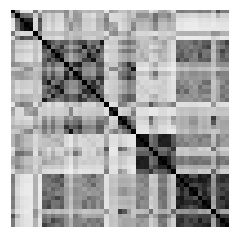

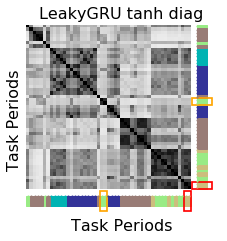

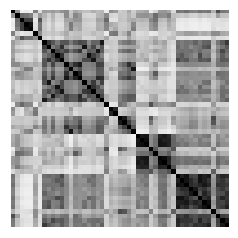

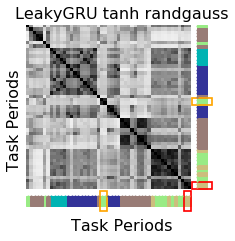

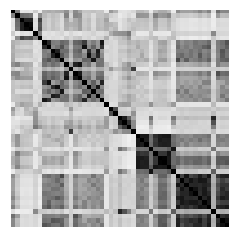

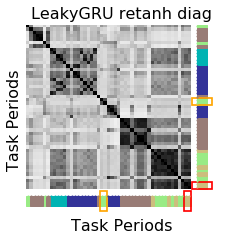

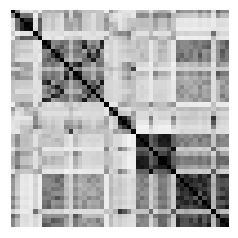

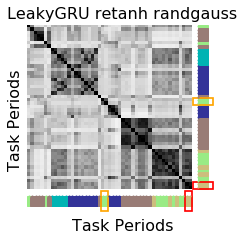

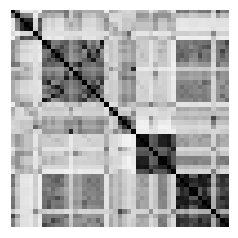

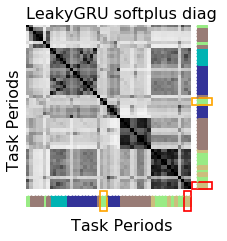

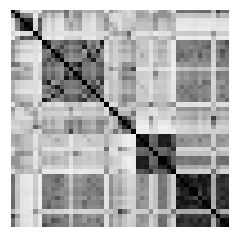

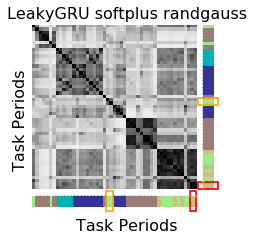

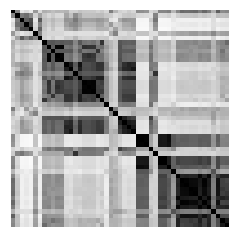

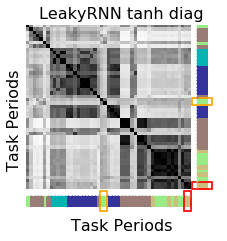

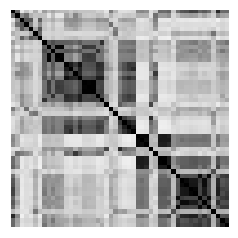

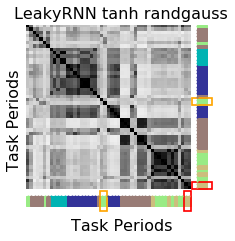

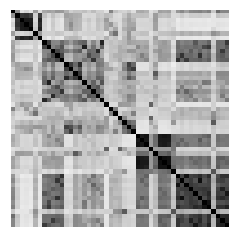

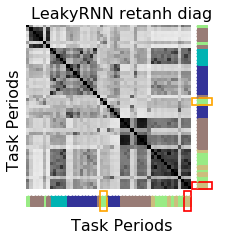

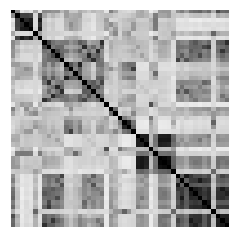

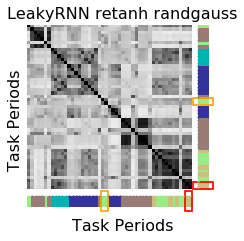

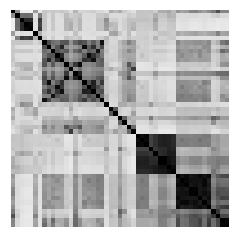

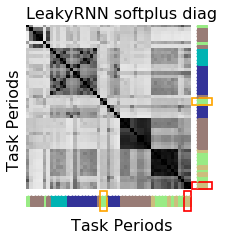

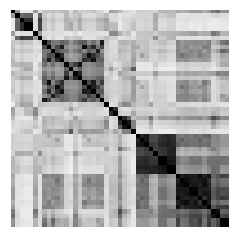

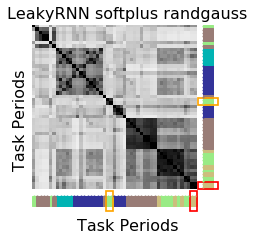

In [15]:
#MAKE COR MATS
# set of networks to compare
import matplotlib.patches as patches
rnn_type_set = ['LeakyGRU','LeakyRNN']
activation_set = ['tanh','retanh','softplus']
w_init_set = ['diag','randgauss']
data_folder_set = ['final1', ]# 

feature_names_labels = [feat_name.rsplit(' ', 1)[0] for feat_name in feature_names_master]
len_te = len(feature_names_labels)
epoch_binary = {}
for e_name in ['delay1','delay2','go1','stim1','stim2']:
    epoch_binary[e_name] = [feat_name.rsplit(' ', 1)[-1]==e_name for 
                            feat_name in feature_names_master]
    
# m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyGRU/softplus/randgauss/15_tasks/128_n_rnn/lr6.0l2_w0.0_h0.0_sig_rec0.05_sig_x0.1_w_rec_coeff0.8_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/0'
method = 'ward'
criterion = 'distance'
cel_max_d = '3.5'
lesion_folder = 'lesion_fps_hierarchical_'+method+'_'+criterion+'_max_d'+str(cel_max_d)
m = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final/all/LeakyRNN/softplus/diag/15_tasks/128_n_rnn/lr7.0l2_w6.0_h6.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/'
# lesion_folder = 'lesion_fps_hierarchical_ward_distance_opt_clust'

for rnn_type_i in range(len(rnn_type_set)):
    for activation_i in range(len(activation_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder in data_folder_set:
            
                rnn_type = rnn_type_set[rnn_type_i]
                activation = activation_set[activation_i]
                w_init = w_init_set[w_init_i]

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
                        w_rec_coeff  = 1
                        lr = -8
                    else:
                        w_rec_coeff  = 8/10
                        lr = -6
                        
                    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

                    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

                    m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                                            rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                                            str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))
                    #load atlas data
                    save_dir = os.path.join(m,lesion_folder)
                    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
                    D = cluster_var['D'].T
                    feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]

                    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
                    X = D[:,feat_order]

                    corr_mat = np.corrcoef(X.T)

                    if seed==seed_set[0]:
                        corr_mat_stack = corr_mat[:,np.newaxis]
                    else:
                        corr_mat_stack = np.concatenate((corr_mat_stack,corr_mat[:,np.newaxis]),axis=1)

                corr_mat_ave = np.mean(corr_mat_stack,axis = 1)

                
                fig = plt.figure(figsize=(4,4))
                ax = plt.subplot(111)
                plt.imshow(corr_mat_ave,cmap= 'Greys',clim = (-.5,1))
                remove_ax_lines(ax)
                ax.set_yticks([])
                ax.set_xticks([])
                
                figname = '_'.join([rnn_type,activation,w_init,data_folder])+'.pdf'
                full_figpath = os.path.join(figpath,'corr_mats_nolabels')
                if not os.path.exists(full_figpath):
                    os.makedirs(full_figpath)
                plt.savefig(os.path.join(full_figpath,figname))
                plt.show()

                
                fig = plt.figure(figsize=(3.5,3.5))
                ax = plt.subplot(111)
                plt.imshow(corr_mat_ave,cmap= 'Greys',clim = (-.5,1))
                label = ' '.join([rnn_type,activation,w_init])
                plt.title(label, fontsize = 16)
                


                feature_names_labels = [feat_name.rsplit(' ', 1)[0] for feat_name in feature_names_master]
                epoch_binary = {}
                for e_name in ['delay1','delay2','go1','stim1','stim2']:
                    epoch_binary[e_name] = [feat_name.rsplit(' ', 1)[-1]==e_name for 
                                            feat_name in feature_names_master]
                plot_epoch_labels(ax,epoch_binary,which_axes = 'xy')
                    
                #                 dmc_where = np.where(feature_names_master=='DMC delay1')[0][0]
                dmc_where = np.where([feat_name=='DMC delay1' for feat_name in feature_names_master])[0][0]-.5
                rect = patches.Rectangle((dmc_where, len(feature_names_master)), 2, 6, 
                                         linewidth=1.7, edgecolor='orange', facecolor='none')
                ax.add_patch(rect)
                rect = patches.Rectangle((len(feature_names_master), dmc_where), 6, 2, 
                                         linewidth=1.7, edgecolor='orange', facecolor='none')
                ax.add_patch(rect)
                
#                 memgo_where = np.where(feature_names_master=='Dly Go delay1')[0][0]
                memgo_where = np.where([feat_name=='Dly DM 1 delay2' for feat_name in feature_names_master])[0][0]-.5
                rect = patches.Rectangle((memgo_where,len(feature_names_master)), 2, 6, 
                                         linewidth=1.7, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                rect = patches.Rectangle((len(feature_names_master),memgo_where), 6, 2, 
                                         linewidth=1.7, edgecolor='red', facecolor='none')
                ax.add_patch(rect)
                
                plt.ylabel('Task Periods',fontsize = 16)
                plt.xlabel('Task Periods',fontsize = 16)
                remove_ax_lines(ax)
                ax.set_yticks([])
                ax.set_xticks([])
                
                remove_ticks(ax)
                remove_spines(ax)
                
                figname = '_'.join([rnn_type,activation,w_init,data_folder,seed])+'.pdf'
                full_figpath = os.path.join(figpath,'corr_mats_labels')
                if not os.path.exists(full_figpath):
                    os.makedirs(full_figpath)
                plt.savefig(os.path.join(full_figpath,figname),bbox_inches = 'tight')
                plt.show()
    
                corr_mat_stack = []

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


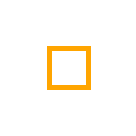

In [16]:
fig = plt.figure(figsize=(2,2),tight_layout=True,facecolor='white')
ax = plt.subplot(111)

dmc_where = np.where([feat_name=='DMC delay1' for feat_name in feature_names_master])[0][0]
rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='orange', facecolor='none')
ax.add_patch(rect)

plt.xlim([-1,2])
plt.ylim([-1,2])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])

figname = 'dmc_box_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'dmc_box_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()

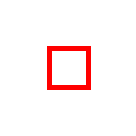

In [17]:
fig = plt.figure(figsize=(2,2),tight_layout=True,facecolor='white')
ax = plt.subplot(111)

memgo_where = np.where([feat_name=='Dly Go delay1' for feat_name in feature_names_master])[0][0]
rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.xlim([-1,2])
plt.ylim([-1,2])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])

figname = 'dlygo_box_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'dlygo_box_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()

In [18]:
color_set = {}
color_set['tanh'] = 'k'
color_set['retanh'] = 'dodgerblue'
color_set['softplus'] = 'orangered'
activation_set = ['tanh','retanh','softplus']

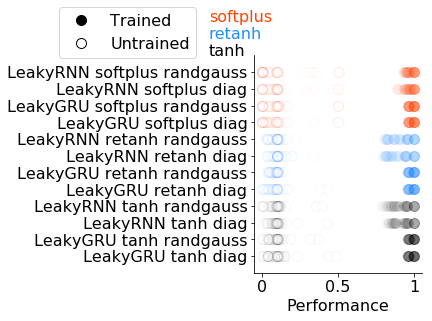

In [19]:
fig = plt.figure(figsize=(3,4))
perf_ax = plt.subplot(111)
plt.rcParams.update({'font.size': 16})
data_folder_set = ['final1','untrained']

# x-axis for plotting each networks correlation coeff, sparsity, performance
x_ind_counter = 0
ax1_xticks = []

perf_ax.plot(0,100,'ok',alpha = 1, markersize = 10,label = 'Trained')
perf_ax.plot(0,100,'ok',alpha = 1, markerfacecolor = 'w', markersize = 10,label = 'Untrained')

for activation_i in range(len(activation_set)):
    for rnn_type_i in range(len(rnn_type_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder in data_folder_set:
            
                
                rnn_type = rnn_type_set[rnn_type_i]
                activation = activation_set[activation_i]
                w_init = w_init_set[w_init_i]
                
                c = color_set[activation]
                if data_folder=='untrained':
                    markerfacecolor = 'w'
                else:
                    markerfacecolor = c
                    
                # x-axis and labelling bs
                if data_folder==data_folder_set[0]:
                    x_ind_counter+=1
                    label = ' '.join([rnn_type,activation,w_init])
                    if len(ax1_xticks)==0:
                        ax1_xticks = [label,]
                    else:
                        ax1_xticks.append(label)

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
                        w_rec_coeff  = 1
                        lr = -8
                    else:
                        w_rec_coeff  = 8/10
                        lr = -6
                    
                    net_name1 = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

                    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str
                        
                    m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                                        rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                                        str(n_rnn)+'_n_rnn',net_name1+net_name2,str(seed))

                    #load performance data
                    fname = os.path.join(m, 'log.json')
                    with open(fname, 'r') as f:
                        log_all = json.load(f)
                        for r in range(len(rule_trains)):
                            x = log_all['perf_' + rule_trains[r]]
                            perf_ax.plot(x[-1],x_ind_counter,'o',alpha = al/10,c = c, 
                                         markerfacecolor = markerfacecolor , markersize = 10)
                            
    perf_ax.text(-.35,13+activation_i,activation,color = color_set[activation])

perf_ax.set_yticks(range(1,len(ax1_xticks)+1))
perf_ax.set_yticklabels(ax1_xticks,rotation = 0,ha = 'right',fontsize = 16)
perf_ax.set_xticks([0,.5,1])
perf_ax.set_xticklabels([0,.5,1],rotation = 0,ha = 'center',fontsize = 16)
plt.legend(bbox_to_anchor=(-.8, .76, .5, .5))
# perf_ax.set_xticklabels([])
perf_ax.set_xlabel('Performance',fontsize = 16)
perf_ax.spines['top'].set_visible(False)
perf_ax.spines['right'].set_visible(False)
perf_ax.set_xlim((-.05,1.05))
perf_ax.set_ylim((0,len(ax1_xticks)+1))

figname = 'Performance.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches = 'tight')

plt.show()

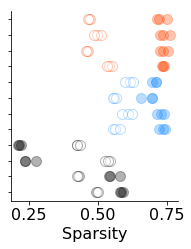

In [20]:
fig = plt.figure(figsize=(3,3.5))
sparsity_ax = plt.subplot(111)

# x-axis for plotting each networks correlation coeff, sparsity, performance
x_ind_counter = 0
ax1_xticks = []

for activation_i in range(len(activation_set)):
    for rnn_type_i in range(len(rnn_type_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder in data_folder_set:
            
                rnn_type = rnn_type_set[rnn_type_i]
                activation = activation_set[activation_i]
                w_init = w_init_set[w_init_i]
                
                c = color_set[activation]
                if data_folder=='untrained':
                    markerfacecolor = 'w'
                else:
                    markerfacecolor = c

                # x-axis and labelling bs
                if data_folder==data_folder_set[0]:
                    x_ind_counter+=1
                    label = ' '.join([rnn_type,activation,w_init])
                    if len(ax1_xticks)==0:
                        ax1_xticks = [label,]
                    else:
                        ax1_xticks.append(label)

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
                        w_rec_coeff  = 1
                        lr = -8
                    else:
                        w_rec_coeff  = 8/10
                        lr = -6
                        
                    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

                    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

                    m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                                            rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                                            str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))

                    #load atlas data
                    save_dir = os.path.join(m,lesion_folder)
                    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
                    D = cluster_var['D'].T
                    feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]

                    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
                    X = D[:,feat_order]

                    #calculate sparsity based on density of non-zero (below theshold) values
                    sparsity_metric_num = len_te*(np.float(n_rnn)-len(D))+np.sum(D.flatten()<sparsity_threshold)
                    sparsity_metric_denom = len_te*np.float(n_rnn)
                    sparsity_metric = sparsity_metric_num/sparsity_metric_denom
                    sparsity_ax.plot(sparsity_metric,x_ind_counter,'o',alpha = al,c = c, 
                                     markerfacecolor = markerfacecolor , markersize = 10)

sparsity_ax.set_yticks(range(1,len(ax1_xticks)+1))
sparsity_ax.set_yticklabels(ax1_xticks,rotation = 0,ha = 'right',fontsize = 16)
sparsity_ax.set_yticklabels([])
sparsity_ax.set_xlabel('Sparsity')
sparsity_ax.spines['top'].set_visible(False)
sparsity_ax.spines['right'].set_visible(False)

figname = 'Sparsity.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches = 'tight')

plt.show()

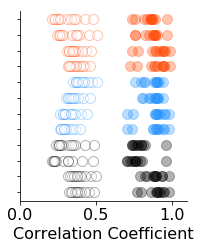

In [21]:
fig = plt.figure(figsize=(3,3.5))
corr_ax = plt.subplot(111)

# x-axis for plotting each networks correlation coeff, sparsity, performance
x_ind_counter = 0
ax1_xticks = []

for activation_i in range(len(activation_set)):
    for rnn_type_i in range(len(rnn_type_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder in data_folder_set:
            
                rnn_type = rnn_type_set[rnn_type_i]
                activation = activation_set[activation_i]
                w_init = w_init_set[w_init_i]
                
                c = color_set[activation]
                if data_folder=='untrained':
                    markerfacecolor = 'w'
                else:
                    markerfacecolor = c

                # x-axis and labelling bs
                if data_folder==data_folder_set[0]:
                    x_ind_counter+=1
                    label = ' '.join([rnn_type,activation,w_init])
                    if len(ax1_xticks)==0:
                        ax1_xticks = [label,]
                    else:
                        ax1_xticks.append(label)

                for seed in seed_set:
                    
                    if data_folder=='no_noise':
                        l2w = -0
                        l2h = -0
                    else:
                        l2w = -6
                        l2h = -6
                        
                    
                    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
                        w_rec_coeff  = 1
                        lr = -8
                    else:
                        w_rec_coeff  = 8/10
                        lr = -6
                    
                    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

                    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

                    m = os.path.join(p,'data','rnn','multitask',net,data_folder,ruleset,
                                            rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                                            str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))

                    #load atlas data
                    save_dir = os.path.join(m,lesion_folder)
                    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
                    D = cluster_var['D'].T
                    feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]

                    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
                    X = D[:,feat_order]

                    corr_mat = np.corrcoef(X.T)

                    if seed==seed_set[0]:
                        corr_mat_stack = corr_mat[:,np.newaxis]
                    else:
                        corr_mat_stack = np.concatenate((corr_mat_stack,corr_mat[:,np.newaxis]),axis=1)


                if data_folder=='final1':
                    corr_mat_ave = np.mean(corr_mat_stack,axis = 1)
                    tril_corr_mat_master = tril_corr_mat_ave[rnn_type][activation][w_init][data_folder]

                    for rnn_type_sub in range(len(rnn_type_set)):
                        for activation_sub in range(len(activation_set)):
                            for w_init_sub in range(len(w_init_set)):
                                for data_folder_sub in data_folder_set:
                                    
                                    if data_folder_sub=='untrained':
                                        markerfacecolor = 'w'
                                    else:
                                        markerfacecolor = c

                                    rnn_type = rnn_type_set[rnn_type_sub]
                                    activation = activation_set[activation_sub]
                                    w_init = w_init_set[w_init_sub]

                                    tril_corr_mat_sub = tril_corr_mat_ave[rnn_type][activation][w_init][data_folder_sub]

                                    corr, pval = pearsonr(tril_corr_mat_master,tril_corr_mat_sub)

                                    if corr!=1:
                                        corr_ax.plot(corr,x_ind_counter,'o',c=c,alpha = al,
                                                     markerfacecolor = markerfacecolor, markersize = 10)

                    
                corr_mat_stack = []

# visualization beautification bs
corr_ax.set_yticks(range(1,len(ax1_xticks)+1))
corr_ax.set_yticklabels(ax1_xticks,rotation = 90,ha = 'center',fontsize = 16)
corr_ax.set_yticklabels([])
corr_ax.set_xlabel('Correlation Coefficient')
corr_ax.set_xlim((0,1.1))
corr_ax.spines['top'].set_visible(False)
corr_ax.spines['right'].set_visible(False)


figname = 'Corr_coeff.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches = 'tight')

plt.show()


In [22]:
def make_cluster_midpoint_labels(clust):
    d = np.concatenate(([-1], np.where(np.diff(clust))[0],[len(clust)-1]),axis = 0)
    mid = np.zeros(len(d))
    cluster_size = np.zeros(len(d))
    for xi in range(len(d)-1):
        cluster_size[xi] = d[xi+1] - d[xi]
        mid[xi] = d[xi+1]-cluster_size[xi]/2+.5
    return cluster_size, mid

In [23]:
from scipy.cluster import hierarchy
color_palette = ['b','c', 'm', 'y', 'r']
color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                 '#e41a1c', '#dede00']
hierarchy.set_link_color_palette(color_palette)
alphabet = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'f', 7:'g', 8:'h', 9:'i', 10:'j', 11:'k', 12:'l', 13:'m', 14:'n',
            15:'o', 16:'p', 17:'q', 18:'r', 19:'s', 20:'t', 21:'u', 22:'v', 23:'w', 24:'x', 25:'y', 26:'z',
           27:'a', 28:'b', 29:'c', 30:'d', 31:'e', 32:'f', 33:'g', 34:'h', 35:'i', 36:'j', 37:'k', 38:'l', 39:'m', 
            40:'n', 41:'o', 42:'p', 43:'q', 44:'r', 45:'s', 46:'t', 47:'u', 48:'v', 49:'w', 50:'x', 51:'y', 52:'z'}


In [24]:
# set of networks to compare
rnn_type_set = ['LeakyRNN','LeakyGRU']
activation_set = ['softplus','tanh','retanh']
w_init_set = ['diag','randgauss']

seed_set = [str(0),str(1),]
max_d = 3.5
n_rnn = str(128)
x_ind_counter = 0
ax1_xticks = []
method = 'ward'

In [25]:
# # set of networks to compare
# rnn_type_set = ['LeakyRNN',]
# activation_set = ['softplus',]
# w_init_set = ['diag',]
# data_folder_set = ['final/all',]
# color_set = {}
# color_set['lr'] = 'k'
# color_set['untrained'] = 'dodgerblue'
# color_set['no_noise'] = 'orangered'

# seed_set = [str(1),]
# max_d = 3.5
# n_rnn = str(128)
# x_ind_counter = 0
# ax1_xticks = []
# method = 'ward'
all_epochs = ['stim1','stim2','delay1','delay2','go1']

In [26]:
n_rnn = 128
l2w = -6
l2h = -6
l1w = 0
l1h = 0
seed = 1
lr = -6
sigma_rec = 1/20
sigma_x = 2/20
pop_rule = 5
ruleset = 'all'
w_rec_coeff  = 8/10

49
128


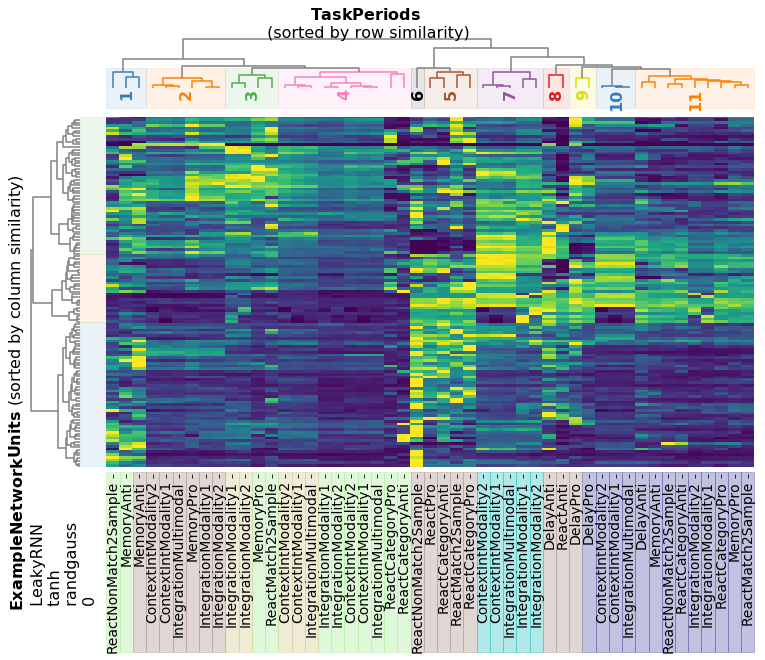

IOError: [Errno 2] No such file or directory: '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/randgauss/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/lesion_fps_hierarchical_ward_maxclust_opt_clust/cluster_var.npz'

In [31]:
### load master network and make average correlation matrix across seeds

data_folder_set = ['final1',]
data_folder=data_folder_set[0]
######supp examples######
# rnn_type = 'LeakyGRU'
# activation = 'softplus'
# w_init = 'diag'
# seed = 0
# ########################
# rnn_type = 'LeakyGRU'
# activation = 'tanh'
# w_init = 'diag'
# seed = 0
########################
rnn_type = 'LeakyRNN'
activation = 'tanh'
w_init = 'randgauss'
seed = 0
# ########################
# rnn_type = 'LeakyRNN'
# activation = 'retanh'
# w_init = 'randgauss'
# seed = 0
# ########################

import matplotlib.patches as mpatches
# for activation_i in range(len(activation_set)):
#     for rnn_type_i in range(len(rnn_type_set)):
#         for w_init_i in range(len(w_init_set)):
#             for data_folder in data_folder_set:
            
#                 c = color_set[data_folder]
#                 rnn_type = rnn_type_set[rnn_type_i]
#                 activation = activation_set[activation_i]
#                 w_init = w_init_set[w_init_i]

# x-axis and labelling bs
if data_folder==data_folder_set[0]:
    x_ind_counter+=1
    label = ' '.join([rnn_type,activation,w_init])
    if len(ax1_xticks)==0:
        ax1_xticks = [label,]
    else:
        ax1_xticks.append(label)

for seed in seed_set:

    if data_folder=='no_noise':
        l2w = -0
        l2h = -0
    else:
        l2w = -6
        l2h = -6

    if (rnn_type == 'LeakyRNN') & (activation == 'tanh') & (data_folder == 'final1'):
        w_rec_coeff  = 1
        lr = -8
    else:
        w_rec_coeff  = 8/10
        lr = -6

    net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)

    net_name2 = '_sig_rec'+str(sigma_rec)+'_sig_x'+str(sigma_x)+'_w_rec_coeff'+"{:.1f}".format(w_rec_coeff)+'_'+rule_trains_str

    m_master = os.path.join(p,'data','rnn','multitask',net,'final1',ruleset,
                            rnn_type,activation,w_init,str(len(rule_trains))+'_tasks',
                            str(n_rnn)+'_n_rnn',net_name+net_name2,str(seed))
    label_master = ' '.join([rnn_type,activation,w_init,seed])

    lesion_folder = 'lesion_fps_hierarchical_ward_maxclust_opt_clust'
    save_dir = os.path.join(m_master,lesion_folder)
    cluster_var = np.load(os.path.join(save_dir,'cluster_var.npz'))
    feature_names_master = cluster_var['tick_names']

    feature_names_labels = [feat_name.rsplit(' ', 1)[0] for feat_name in feature_names_master]
    epoch_binary = {}
    for e_name in ['delay1','delay2','go1','stim1','stim2']:
        epoch_binary[e_name] = [feat_name.rsplit(' ', 1)[-1]==e_name for 
                                feat_name in feature_names_master]

    D = cluster_var['D'].T
    feature_names_original = [cluster_var['tick_names'][s] for s in range(len(cluster_var['tick_names']))]

    feat_order = [feature_names_original.index(s) for i,s in enumerate(feature_names_master)]
    X = D[:,feat_order]

    #visualize atlas for master network
    fig = plt.figure(figsize=(18,9))
    plt.rcParams.update({'font.size': 16})
    legend_done = 0
    atlas_width = .55
    atlas_height = .55
    thresh = 4

    axdendro_top = fig.add_axes([.06,atlas_height+.09,atlas_width-.05,.08])
    Y = sch.linkage(X.T, method=method)
    clusters_top = fcluster(Y, thresh, criterion=criterion)
    Z_top = sch.dendrogram(Y, orientation='top',#labels = clusters, #CA.ind_active #clusters
                       leaf_font_size = 11,color_threshold=thresh,
                              above_threshold_color='gray', labels = clusters_top)
#                     plt.text(-96,-18,'Task Period \n Cluster #')

    cluster_size,mid_top = make_cluster_midpoint_labels(clusters_top)
    for xi in range(len(mid_top)-1):
        if cluster_size[xi]==1:
            c = 'k'
        else:
            color_ind = xi - np.sum(cluster_size[:xi]==1)
            c = color_palette[color_ind%len(color_palette)]
        clust_mid = mid_top[xi]
        rect=mpatches.Rectangle((5+10*(clust_mid-cluster_size[xi]/2),-5),cluster_size[xi]*10,10, 
        fill=True,color=c,facecolor=c,alpha = .1,clip_on=False)
        plt.gca().add_patch(rect)
        plt.text(clust_mid*10,-3,str(clusters_top[int(clust_mid)]),color=c,fontweight='bold',rotation = 90)
#                         plt.text(xi*10,-15,str(clusters_sorted[int(xi)]))

    remove_spines(axdendro_top)
    remove_ticks(axdendro_top)
    axdendro_top.set_xticks([])

    axdendro = fig.add_axes([0,.054,0.04,atlas_height*.98])
    Y = sch.linkage(X, method=method)
    clusters = cluster_var['clusters']
    Z = sch.dendrogram(Y, orientation='left',#labels = clusters, #CA.ind_active #clusters
                       leaf_font_size = 11,color_threshold=0,above_threshold_color='gray', labels = clusters)

    cluster_size, mid = make_cluster_midpoint_labels(clusters)
    for xi in range(len(mid)-1):

        c = color_palette[xi%len(color_palette)]
        clust_mid = mid[xi]
        rect=mpatches.Rectangle((-5,10+10*(clust_mid-cluster_size[xi]/2)),5,cluster_size[xi]*10, 
        fill=True,
        color=c,facecolor=c,alpha = .1,clip_on=False)
        plt.gca().add_patch(rect)
#         plt.text(-1.5,10*clust_mid-20,alphabet[clusters[int(clust_mid)]],color =c,rotation = 90)

    remove_spines(axdendro)
    remove_ticks(axdendro)
    axdendro.set_xticks([])


    axmatrix = fig.add_axes([.06,0.045,atlas_width-.05,atlas_height])#fig.add_subplot(1,2,1)
    index_top = Z['leaves']
    X = X[index_top,:]
    plt.imshow(X[-1:0:-1,:],cmap= 'viridis', aspect='auto')

    len_te = len(feature_names_labels)
    axmatrix.set_xticks(range(len_te))
    task_labels = [task_name_dict[feat] for feat in feature_names_labels]
    axmatrix.set_xticklabels(task_labels,fontsize = 14, rotation =90,ha = 'center')
#                     plot_epoch_labels(axmatrix,epoch_binary,which_axes = 'y',ms = 12.5)
    plot_epoch_rects(axmatrix,epoch_binary,all_epochs,which_axes = 'y', rect_height = 1, rect_width = 65)
#                     plt.legend(bbox_to_anchor=(1.1, -.13),ncol=2,fontsize = 14,rotation = 90)    

    plt.text(-8,len(X)/5,r"$\bf{Units}$"+' (sorted by column similarity)',rotation = 90)
    plt.text(-8,1.2*len(X),r"$\bf{Example Network}$"+ ' \n '+' \n '.join(label_master.split()),rotation = 90)
    axmatrix.set_xlabel(r"$\bf{Task Periods}$"+ ' \n (sorted by row similarity)')
    axmatrix.xaxis.set_label_coords(.4, 1.31)
#                     cbar = plt.colorbar(orientation="vertical",fraction=0.04, pad=.01,anchor=(-.15,.5))
#                     cbar.ax.set_xticks([0,1])
#                     cbar.ax.set_xticklabels([0,1], rotation=90)
#                     cbar.set_label('Normalized Variance')
    remove_spines(axmatrix)
    axmatrix.set_yticks([])
    plt.ylim((len(X)+1,0))

    # make subpanels.
    sp_width = .14
    sp_wide = .2
    offset = .06

    label = '_'.join([data_folder,rnn_type,activation,w_init,seed])
    figname = 'atlas_'+label+'.pdf'
    figpath_full = os.path.join(figpath,'atlas',data_folder)
    if not os.path.exists(figpath_full):
        os.makedirs(figpath_full)
    plt.savefig(os.path.join(figpath_full,figname),bbox_inches = 'tight')

    plt.show()

In [33]:
max(clusters_top)

11

In [36]:
save_dir

'/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/final1/all/LeakyRNN/tanh/randgauss/15_tasks/128_n_rnn/lr8.0l2_w6.0_h6.0_sig_rec0.05_sig_x0.1_w_rec_coeff1.0_fdgo_reactgo_delaygo_fdanti_reactanti_delayanti_delaydm1_delaydm2_contextdelaydm1_contextdelaydm2_multidelaydm_dmsgo_dmsnogo_dmcgo_dmcnogo/1/lesion_fps_hierarchical_ward_maxclust_opt_clust'

In [28]:
epoch_set = ['Stimulus1','Stimulus2','Memory1','Memory2','Response']

epoch_b = {}

for e_ind in range(len(epoch_set)):
    epoch_b[epoch_set[e_ind]] = np.zeros(len(epoch_set))
    epoch_b[epoch_set[e_ind]][e_ind] = 1

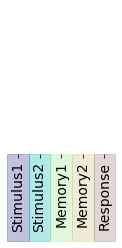

In [29]:
fig = plt.figure(figsize=(1.2,2))
ax = fig.add_axes([0,0,1,1])#fig.add_subplot(1,2,1)
ax.set_xticks(range(len(epoch_set)))
ax.set_xticklabels(epoch_set,fontsize = 14, rotation =90,ha = 'center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
# ax.set_xticks([])
    
plot_epoch_rects(ax,epoch_b,epoch_set,which_axes = 'y', rect_height = 1, rect_width = .6, ll = [-.6,0])
plt.savefig(os.path.join(figpath_full,'legend.pdf'),bbox_inches = 'tight')

/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/usr/local/Caskroom/miniconda/base/envs/tensorflow/lib/python2.7/site-packages/matplotlib/axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


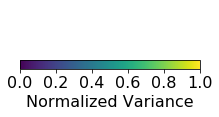

In [30]:
fig = plt.figure(figsize=(1,1),tight_layout=True,facecolor='white')
ax = fig.add_axes([0, 0, 2.5, 1])
plt.imshow(X[-1:0:-1,:],cmap= 'viridis', aspect='auto')
plt.xlim([0,-.1])
plt.ylim([0,-.1])
remove_spines(ax)
ax.set_yticks([])
ax.set_xticks([])
cbar = plt.colorbar(orientation="horizontal",fraction=0.5,pad=.5,anchor=(-.15,.5))
cbar.set_label('Normalized Variance')

figname = 'var_legend.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

figname = 'var_legend.png'
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')
plt.show()